# AMR

##  Data analysis and augmentation

In [84]:
!python -m spacy download en_core_web_sm
!pip install -U spacy
!pip install -U amrlib
!pip show amrlib


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
      --------------------------------------- 0.2/12.8 MB 2.5 MB/s eta 0:00:06
     - -------------------------------------- 0.3/12.8 MB 2.5 MB/s eta 0:00:05
     - -------------------------------------- 0.4/12.8 MB 2.5 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 2.4 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/12.8 MB 2

DEPRECATION: Loading egg at c:\users\wiebke petersen\anaconda3\lib\site-packages\huggingface_hub-0.16.4-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


DEPRECATION: Loading egg at c:\users\wiebke petersen\anaconda3\lib\site-packages\huggingface_hub-0.16.4-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


DEPRECATION: Loading egg at c:\users\wiebke petersen\anaconda3\lib\site-packages\huggingface_hub-0.16.4-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Name: amrlib
Version: 0.8.0
Summary: A python library that makes AMR parsing, generation and visualization simple.
Home-page: https://github.com/bjascob/amrlib
Author: Brad Jascob
Author-email: bjascob@msn.com
License: UNKNOWN
Location: C:\Users\Wiebke Petersen\anaconda3\Lib\site-packages
Requires: numpy, penman, smatch, spacy, torch, tqdm, transformers
Required-by: 


DEPRECATION: Loading egg at c:\users\wiebke petersen\anaconda3\lib\site-packages\huggingface_hub-0.16.4-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [366]:
# data path
data_path = './data/'
type =    "train" #  "test" #   

In [367]:
import pandas as pd
df  = pd.read_csv(data_path + 'trial.csv')
print("trial data shape: ", df.shape)
print(df["num_statements"].value_counts())
df = pd.read_csv(data_path + 'train.csv')
print("train data shape: ", df.shape)
print(df["num_statements"].value_counts())
df = pd.read_csv(data_path + 'test.csv')
print("test data shape: ", df.shape)
print(df["num_statements"].value_counts())


trial data shape:  (26, 11)
1    15
2     9
3     1
0     1
Name: num_statements, dtype: int64
train data shape:  (2944, 10)
1    1530
2     732
0     449
3     191
4      38
5       3
6       1
Name: num_statements, dtype: int64
test data shape:  (416, 10)
1    258
2    123
3     28
4      6
5      1
Name: num_statements, dtype: int64


In [388]:
# read in data. train data is combined with trial data

import pandas as pd

# open train.csv
df = pd.read_csv(data_path+ type + '.csv')
df_trial = pd.read_csv(data_path+ 'trial.csv')

if type == "train":
    df = pd.concat([df,df_trial], join="inner")
    df = df.drop_duplicates(subset=['sent-id'], keep='last')



### Data augmentation

unballanced data => data augmentation for examples with num_statements >1 
method: round-trip translation

In [363]:
# Careful, takes time to run
# for each sentence, if num_statements > 1 then translate to Finnish and back to German
import pandas as pd
from deep_translator import GoogleTranslator
if type == "train":
    df_aug = df[df['num_statements'] > 1]
    df_aug['finnish'] = df_aug['phrase'].apply(lambda x: GoogleTranslator(source='de', target='fi').translate(x))
    df_aug['german'] = df_aug['finnish'].apply(lambda x: GoogleTranslator(source='fi', target='de').translate(x))

In [372]:
df_aug["phrase"] = df_aug["german"]
df_aug.drop(columns=["finnish", "german"], inplace=True)
df_aug["sent-id"] = df_aug["sent-id"].apply(lambda x: x + 1000000)
df_aug.to_csv(data_path + type + '_aug.csv', index=False)
print(df_aug.shape)


(973, 10)


In [374]:
df_aug.to_csv(data_path + 'finnish_augm.csv', index=False)

In [389]:
df_aug = pd.read_csv(data_path + 'finnish_augm.csv')
df_orig = df
df = pd.concat([df, df_aug], join="inner")



In [390]:
df["num_statements"].value_counts()

1    1545
2    1478
0     449
3     384
4      76
5       6
6       2
Name: num_statements, dtype: int64

In [385]:
# alternatively, you can the dictionary containing languages mapped to their abbreviation
langs_dict = GoogleTranslator().get_supported_languages(as_dict=True)  # output: {arabic: ar, french: fr, english:en etc..
langs_dict

{'afrikaans': 'af',
 'albanian': 'sq',
 'amharic': 'am',
 'arabic': 'ar',
 'armenian': 'hy',
 'assamese': 'as',
 'aymara': 'ay',
 'azerbaijani': 'az',
 'bambara': 'bm',
 'basque': 'eu',
 'belarusian': 'be',
 'bengali': 'bn',
 'bhojpuri': 'bho',
 'bosnian': 'bs',
 'bulgarian': 'bg',
 'catalan': 'ca',
 'cebuano': 'ceb',
 'chichewa': 'ny',
 'chinese (simplified)': 'zh-CN',
 'chinese (traditional)': 'zh-TW',
 'corsican': 'co',
 'croatian': 'hr',
 'czech': 'cs',
 'danish': 'da',
 'dhivehi': 'dv',
 'dogri': 'doi',
 'dutch': 'nl',
 'english': 'en',
 'esperanto': 'eo',
 'estonian': 'et',
 'ewe': 'ee',
 'filipino': 'tl',
 'finnish': 'fi',
 'french': 'fr',
 'frisian': 'fy',
 'galician': 'gl',
 'georgian': 'ka',
 'german': 'de',
 'greek': 'el',
 'guarani': 'gn',
 'gujarati': 'gu',
 'haitian creole': 'ht',
 'hausa': 'ha',
 'hawaiian': 'haw',
 'hebrew': 'iw',
 'hindi': 'hi',
 'hmong': 'hmn',
 'hungarian': 'hu',
 'icelandic': 'is',
 'igbo': 'ig',
 'ilocano': 'ilo',
 'indonesian': 'id',
 'irish': 'ga

In [392]:
df_aug = df_orig[df_orig['num_statements'] > 2]
print(df_aug.shape)
df_aug['chinese'] = df_aug['phrase'].apply(lambda x: GoogleTranslator(source='de', target='zh-CN').translate(x))
df_aug['german'] = df_aug['chinese'].apply(lambda x: GoogleTranslator(source='zh-CN', target='de').translate(x))
df_aug[['phrase', 'chinese', 'german']].head(10)

(234, 10)


C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\2319449066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['chinese'] = df_aug['phrase'].apply(lambda x: GoogleTranslator(source='de', target='zh-CN').translate(x))
C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\2319449066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['german'] = df_aug['chinese'].apply(lambda x: GoogleTranslator(source='zh-CN', target='de').translate(x))


,phrase,chinese,german
35,Im Jahr 1986 hat die UNESCO gesagt: \newline D...,1986年，联合国教科文组织表示：\newline阿勒颇老城现已成为世界遗产。,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...
41,Die größte Stadt in Syrien ist Damaskus.,叙利亚最大的城市是大马士革。,Die größte Stadt in Syrien ist Damaskus.
63,Er stirbt am 2. August 1922. \newline In Badde...,他于 1922 年 8 月 2 日去世。 \newline 于加拿大巴德克。,Er starb am 2. August 1922. \newline in Baddec...
66,Der Vater von Bell war Professor für Rede-kuns...,贝尔的父亲是一位演讲和演讲教授。,Bells Vater war Dozent für Vorlesungen und Reden.
96,Er stirbt am 26. Juni 1982. \newline In Frankf...,他于 1982 年 6 月 26 日去世。 \newline 在德国美因河畔法兰克福。,Er starb am 26. Juni 1982. \newline in Frankfu...
103,Das Buch hat er zusammen mit seiner Frau Marga...,他与妻子玛格丽特·米切尔利希 (Margarete Mitscherlich) 一起撰写了这本书。,Er schrieb das Buch zusammen mit seiner Frau M...
106,Er stirbt am 10. Februar 1837. \newline In Sa...,他于 1837 年 2 月 10 日去世。 \newline 在俄罗斯圣彼得堡。,Er starb am 10. Februar 1837. \newline in St. ...
110,Er stirbt am 23. September 1973. \newline In A...,他于 1973 年 9 月 23 日去世。 \newline 在英格兰萨福克郡奥尔德堡。,Er starb am 23. September 1973. \newline In Al...
121,Sie stirbt am 14. April 2010. \newline In Sain...,她于 2010 年 4 月 14 日去世。 \newline 法国普罗旺斯-阿尔卑斯-蓝色海...,Sie starb am 14. April 2010. \newline Saint-Ré...
187,Eine Allee ist lang \newline und hat rechts u...,一条大道很长 \newline ，左右都有树。,Eine lange Allee \newline hat auf beiden Seite...


In [393]:
df_aug["phrase"] = df_aug["german"]
df_aug.drop(columns=["chinese", "german"], inplace=True)
df_aug["sent-id"] = df_aug["sent-id"].apply(lambda x: x + 10000000)
df_aug.to_csv(data_path + 'chinese_aug.csv', index=False)

C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\869846774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug["phrase"] = df_aug["german"]
C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\869846774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug.drop(columns=["chinese", "german"], inplace=True)
C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\869846774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [394]:
df_aug["num_statements"].value_counts()

3    192
4     38
5      3
6      1
Name: num_statements, dtype: int64

In [395]:
df_aug = pd.read_csv(data_path + 'chinese_aug.csv')
df_fin = pd.read_csv(data_path + 'finnish_augm.csv')
augm = pd.concat([df_aug, df_fin], join="inner")
print(augm.shape)
print(augm["num_statements"].value_counts())
print(augm.columns)
augm.to_csv(data_path + 'augmented.csv', index=False)


(1207, 10)
2    739
3    384
4     76
5      6
6      2
Name: num_statements, dtype: int64
Index(['sent-id', 'topic', 'phrase', 'phrase_number', 'genre', 'timestamp',
       'user', 'phrase_tokenized', 'num_statements', 'statement_spans'],
      dtype='object')


In [371]:
"""
# Bart for translation
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
df = df[df['num_statements'] > 1]

tokenizer.src_lang = "de_DE"


# translate to Chinese
df['Chinese'] = df['phrase'].apply(lambda x: 
                                   tokenizer(x, return_tensors="pt", padding=True, truncation=True))#.to('cuda'))
print("tokenizer Chinese done")
df['Chinese'] = df['Chinese'].apply(lambda x: model.generate(**x, forced_bos_token_id=tokenizer.lang_code_to_id["zh_CN"], max_length=128, num_beams=4, early_stopping=True))
print("model Chinese done")
df['Chinese'] = df['Chinese'].apply(lambda x: tokenizer.decode(x[0], skip_special_tokens=True))
print("decode Chinese done")

tokenizer.src_lang = "zh_CN"
# translate back to German
df['German'] = df['Chinese'].apply(lambda x: tokenizer(x, return_tensors="pt", padding=True, truncation=True).to('cuda'))
print("tokenizer German done")
df['German'] = df['German'].apply(lambda x: model.generate(**x, forced_bos_token_id=tokenizer.lang_code_to_id["de_DE"],max_length=128, num_beams=4, early_stopping=True))
print("model German done")
df['German'] = df['German'].apply(lambda x: tokenizer.decode(x[0], skip_special_tokens=True))
print("decode German done")

df[['phrase','Chinese','German']]

"""


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tokenizer Chinese done


KeyboardInterrupt: 

### Read data

In [402]:
type = "augmented"

In [403]:
# read in data. train data is combined with trial data

import pandas as pd

# open train.csv
df = pd.read_csv(data_path+ type + '.csv')

if type == "augmented":
    df = pd.read_csv(data_path+ 'augmented.csv')
    print(df.shape)
    print(df["num_statements"].value_counts())

if type == "train":
    df_trial = pd.read_csv(data_path+ 'trial.csv')
    print(df.shape, df_trial.shape)
    df = pd.concat([df,df_trial], join="inner")
    print(df.shape)
    df = df.drop_duplicates(subset=['sent-id'], keep='last')
    print(df["num_statements"].value_counts())



(1207, 10)
2    739
3    384
4     76
5      6
6      2
Name: num_statements, dtype: int64


### Translate and AMR of English translation

In [404]:
# CAREFUL: takes time 

# translate the text to english
from deep_translator import GoogleTranslator
df['english'] = df['phrase'].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))
df.head()

,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,english
0,10001025,aleppo,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...,12_long,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Im 1:=Jahr 2:=1986 3:=hat 4:=die 5:=UNESCO ...,4,"[[0, 1, 2], [3, 5, 6], [9, 10, 11, 12, 14], [13]]","In 1986, UNESCO declared:\newlineThe old town ..."
1,10001032,aleppo,Die größte Stadt in Syrien ist Damaskus.,2_short,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Die 1:=größte 2:=Stadt 3:=in 4:=Syrien 5:=i...,3,"[[5, 6], [1], [3, 4]]",The largest city in Syria is Damascus.
2,10001054,alexander-graham-bell,Er starb am 2. August 1922. \newline in Baddec...,2_long,Personen|Seiten_mit_defekten_Dateilinks,2022-03-03T19:51:00Z,28d34f2e053dee2c0e9399a7924cd978,0:=Er 1:=stirbt 2:=am 3:=2. 4:=August 5:=1922....,3,"[[2, 3, 4, 5], [7, 8], [9]]","He died on August 2, 1922. \newline in Baddeck..."
3,10001057,alexander-graham-bell,Bells Vater war Dozent für Vorlesungen und Reden.,5_long,Personen|Seiten_mit_defekten_Dateilinks,2022-03-03T19:51:00Z,28d34f2e053dee2c0e9399a7924cd978,0:=Der 1:=Vater 2:=von 3:=Bell 4:=war 5:=Profe...,3,"[[0, 1, 2, 3, 4], [6, 7], [6, 9]]",Bell's father was a lecturer and speaker.
4,10001089,alexander-mitscherlich,Er starb am 26. Juni 1982. \newline in Frankfu...,2_long,Ohne_Kategorie|Seiten_mit_defekten_Dateilinks,2022-02-28T12:34:31Z,e800bebc9060331edfac65e663a55570,0:=Er 1:=stirbt 2:=am 3:=26. 4:=Juni 5:=1982. ...,3,"[[2, 3, 4, 5], [7, 8, 9, 10], [7, 11]]","He died on June 26, 1982. \newline in Frankfur..."


In [405]:
# CAREFUL: takes time 

import spacy
import amrlib
amrlib.setup_spacy_extension()

nlp = spacy.load('en_core_web_sm')


#  save amr of english in column amr
amr = []
for text in df['english']:
    doc = nlp(text)
    graphs = doc._.to_amr()
    amr.append(graphs)
df['amr'] = amr
print(len(amr),df.shape)

gid=x Start paren present but old is not a new concept
gid=x Start paren present but permit-01 is not a new concept
gid=x Start paren present but have-03 is not a new concept
gid=x Missing starting paren for node a/and
gid=x Initial node constructed when triples not empty, ignoring token.
gid=x Initial node constructed when triples not empty, ignoring token.
gid=x Start paren present but person is not a new concept
gid=x Start paren present but prescribe-02 is not a new concept
gid=x Start paren present but city is not a new concept
gid=x Start paren present but person is not a new concept
gid=x Start paren present but square is not a new concept
gid=x Start paren present but product is not a new concept
gid=x Missing starting paren for node c/company
gid=x Start paren present but company is not a new concept
gid=x Start paren present but string-entity is not a new concept
gid=x Start paren present but person is not a new concept
gid=x Start paren present but permit-01 is not a new con

1207 (1207, 12)


In [406]:
df.head(3)

,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,english,amr
0,10001025,aleppo,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...,12_long,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Im 1:=Jahr 2:=1986 3:=hat 4:=die 5:=UNESCO ...,4,"[[0, 1, 2], [3, 5, 6], [9, 10, 11, 12, 14], [13]]","In 1986, UNESCO declared:\newlineThe old town ...","[# ::snt In 1986, UNESCO declared:\newlineThe ..."
1,10001032,aleppo,Die größte Stadt in Syrien ist Damaskus.,2_short,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Die 1:=größte 2:=Stadt 3:=in 4:=Syrien 5:=i...,3,"[[5, 6], [1], [3, 4]]",The largest city in Syria is Damascus.,[# ::snt The largest city in Syria is Damascus...
2,10001054,alexander-graham-bell,Er starb am 2. August 1922. \newline in Baddec...,2_long,Personen|Seiten_mit_defekten_Dateilinks,2022-03-03T19:51:00Z,28d34f2e053dee2c0e9399a7924cd978,0:=Er 1:=stirbt 2:=am 3:=2. 4:=August 5:=1922....,3,"[[2, 3, 4, 5], [7, 8], [9]]","He died on August 2, 1922. \newline in Baddeck...","[# ::snt He died on August 2, 1922.\n(d / die-..."


In [407]:
df.to_csv(data_path + type + '_amr.csv')

### write Prolog input 

Structure of AMRs:

In [408]:
import pandas as pd
df = pd.read_csv(data_path + type + '_amr.csv')

In [409]:
# remove all rows with num-statements =0
print(df.shape )
df = df[df['num_statements'] > 0]
print(df.shape )
df.to_csv(data_path + type + '_amr.csv')

(1207, 13)
(1207, 13)


In [410]:

import ast
t = df['amr'].loc[0]
tt = ast.literal_eval(t)
print(t)
print(tt)
print(tt[0])
print(transform_graph(t))


output = "[a, attr-instance, alchemist, attr-domain, [p, attr-instance, person, attr-name, [n, attr-instance, name, attr-op1, ""mary"", attr-op2, ""the"", attr-op3, ""jewess""], attr-arg1_of, [f, attr-instance, fame_01, attr-degree, [v, attr-instance, very]]]]"

['# ::snt In 1986, UNESCO declared:\\newlineThe old town of Aleppo is now a World Heritage Site.\n(d / declare-01\n      :ARG0 (o / organization\n            :name (n / name\n                  :op1 "UNESCO"))\n      :ARG2 (s / site\n            :mod (h / heritage\n                  :mod (w / world))\n            :domain (t / town\n                  :name (n2 / name\n                        :op1 "Aleppo")\n                  :mod (o2 / old))\n            :time (n3 / now))\n      :time (d2 / date-entity\n            :year 1986)\n      :mod (l / line\n            :mod o2))']
['# ::snt In 1986, UNESCO declared:\\newlineThe old town of Aleppo is now a World Heritage Site.\n(d / declare-01\n      :ARG0 (o / organization\n            :name (n / name\n                  :op1 "UNESCO"))\n      :ARG2 (s / site\n            :mod (h / heritage\n                  :mod (w / world))\n            :domain (t / town\n                  :name (n2 / name\n                        :op1 "Aleppo")\n             

In [411]:
# transform amr graph to nested list for easier manipulation with Prolog
# [t, :instance, test-01, :ARG1, [e, :instance, extend-01, :ARG1, [p, :instance, product, :name, [n, :instance, name, :op1, "SpaCy"]]], :domain, [t2, :instance, this]]
# [t, [[:instance, test-01],[:ARG1, [ e, [:instance, extend-01], [:ARG1, [ p, [:instance, product], [:name, [ n, [:instance, name], [:op1, "SpaCy"]]]]]]], [:domain, [ t2, [:instance, this]]]]

import ast

def transform_graph(g):
    # delete everything before (
    # g = list(ast.literal{eval(g))
    #print(str(ast.literal_eval(g)))
    g = list(ast.literal_eval(g))
    #print(g)
    g = str(g[0].split('\n(')[1:])
    #print(g)
    g = "(" + g 
    #print(g)
    # take care of polarty
    g = g.replace('polarity -', 'polarity negative')
    g = g.replace('polarity +', 'polarity positive')
    # remove . !  ? : ;
    g = g.replace('.', '')
    g = g.replace('!', '')
    g = g.replace('?', '')
    g = g.replace(': ', '')
    g = g.replace(';', '')
    g = g.replace("'", '')
    # replace every [ by 
    g = g.replace('[', '')
    g = g.replace(']', '')    
    # replace every / by :instance
    g = g.replace('/', ':instance')
    # replace \n by ''
    g = g.replace('\newline','')
    g = g.replace('\\n', '')
    g = g.replace('\\', '')
    g = g.strip()
    # remove spaces by single space
    g = ' '.join(g.split())
    # transform to list
    g = g.replace('(', '[')
    g = g.replace(')', ']')
    # replace ' ' by ','        
    g = g.replace(' ', ', ')
    g = g.replace('.', '!')
    g = g.replace('-', '_')
    # replace ':' by 'attr-'
    g = g.replace(':', 'attr-')
    g = g.replace(',,', ',')
    # all to lower case
    g = g.lower()
    return g






In [412]:
# in each row apply the function transform_graph to the graph in column amr and write the result in column amr_prolog
# radikale Vereinfachung, wir nehmen immer nur den Graph des 1. Satzes.


df['amr_prolog'] =[transform_graph(str(x)) for x in df["amr"]]


In [413]:

print(df.shape)
df.head(2)

(1207, 14)


,Unnamed: 0,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,english,amr,amr_prolog
0,0,10001025,aleppo,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...,12_long,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Im 1:=Jahr 2:=1986 3:=hat 4:=die 5:=UNESCO ...,4,"[[0, 1, 2], [3, 5, 6], [9, 10, 11, 12, 14], [13]]","In 1986, UNESCO declared:\newlineThe old town ...","['# ::snt In 1986, UNESCO declared:\\newlineTh...","[d, attr-instance, declare_01, attr-arg0, [o, ..."
1,1,10001032,aleppo,Die größte Stadt in Syrien ist Damaskus.,2_short,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Die 1:=größte 2:=Stadt 3:=in 4:=Syrien 5:=i...,3,"[[5, 6], [1], [3, 4]]",The largest city in Syria is Damascus.,['# ::snt The largest city in Syria is Damascu...,"[h, attr-instance, have_degree_91, attr-arg1, ..."


In [414]:
# write file . for each row in the dataframe write "ex(",row["sent-id"], ",", row["amr"], ").\n" to the file
with open(type + '_for_prolog_amr.pl', 'w') as f:
    for index, row in df.iterrows():
        f.write("ex("+str(row["sent-id"]) + ", "+ row["amr_prolog"] + ").\n")
          




In [415]:
type

'augmented'

Run transform_all from Prolog file amr.pl. In line 1 set type to recent type.  

## Take Prolog output and compute feature matrix

Needs file features_train.txt / features_test.txt written by Prolog file amr.pl.

In [416]:
# read the file with the features. The file has the following line format: SentId; feature1, feature2, feature3, ...

def read_features_from_file(file):
    features = {}
    with open(file) as f:
        for line in f:
            # remove all spaces
            line = line.replace(" ", "")
            #line = line.replace("\n", "")
            line = line.strip()
            if ";" in line:
                id = line.split(";")[0]
                feat = line.split(";")[1]
                if "," in feat:
                    feature_list = feat.split(",")
                    features[id] = feature_list
                else: 
                    print("Error")
            else:
#                print("Error")
                print(line)
    return features


In [417]:
# generate feature matrix

def make_feature_matrix(features):
    formatted_data = []
    for key, value in features.items():
        for feature in value:
            formatted_data.append({'sent-id': key, 'Feature': feature})
    formatted_df = pd.DataFrame(formatted_data)
    formatted_df = formatted_df.drop_duplicates(subset=['sent-id', 'Feature'])
    # Pivotiere das DataFrame, um die Merkmalsmatrix zu erstellen
    feature_matrix = formatted_df.pivot_table(index='sent-id', columns='Feature', aggfunc=len, fill_value=0)
    
    # Optional: Spaltennamen anpassen
    feature_matrix.columns.name = None
    feature_matrix.reset_index(inplace=True)
    return feature_matrix




In [418]:
#type = "test"

file = 'features_' + type + '.txt'
features = read_features_from_file(file)
print(len(features))
feature_matrix = make_feature_matrix(features)
print(feature_matrix.shape)
print(type)

1207
(1207, 9805)
augmented


In [419]:
# feature matrix with labels

# read df from csv
df = pd.read_csv(data_path + type + '_amr.csv')
df["sent-id"] =df["sent-id"].astype(str)
# add labels to feature_matrix from df
feature_matrix = feature_matrix.merge(df[['sent-id','num_statements']], on='sent-id')
feature_matrix.rename(columns={'num_statements':'label'}, inplace=True)
print(feature_matrix.shape)
feature_matrix.head(3)

(1207, 9806)


,sent-id,,attr-(mod):,attr-(mod):attr-(mod):,attr-(mod):attr-(mod):attr-instance:,attr-(mod):attr-(mod):attr-instance:card,attr-(mod):attr-(mod):attr-instance:newline,attr-(mod):attr-(mod):attr-instance:old,attr-(mod):attr-degree:,attr-(mod):attr-degree:attr-instance:,...,bowie,cryptocurrency,ewline,gdpr,hebdo,paddock,pin,procedure,winter,label
0,1000040,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,10001025,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
2,10001032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [421]:
# filter all columns with less than min_values entries unequal 0
min_values = 3
if type == "train" or type == "augmented":
    print(feature_matrix.shape)
    feature_matrix = feature_matrix.loc[:, (feature_matrix != 0).sum() >= min_values]
    print(feature_matrix.shape)

(1207, 9806)
(1207, 1247)


In [422]:
# save the feature matrix to a csv file
if type == "train":
    feature_matrix.to_csv(data_path + type + '_amr_feature_matrix.csv',index=False)
if type == "test" or type == "augmented": # test and augmented data get the features from train data
    # read the columns feature matrix from the train data
    cols = pd.read_csv(data_path + 'train_amr_feature_matrix.csv').columns
    # feature_matrix with the same columns as the train feature matrix. Fill NaN with 0
    feature_matrix = feature_matrix.reindex(columns=cols, fill_value=0)
    feature_matrix.to_csv(data_path + type + '_amr_feature_matrix.csv',index=False)


# Dependency trees

In [423]:
!python -m spacy download de_core_news_sm


     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/14.6 MB 2.0 MB/s eta 0:00:08
      --------------------------------------- 0.2/14.6 MB 1.9 MB/s eta 0:00:08
      --------------------------------------- 0.3/14.6 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.4/14.6 MB 2.1 MB/s eta 0:00:07
     - -------------------------------------- 0.5/14.6 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.6/14.6 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.6/14.6 MB 2.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/14.6 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/14.6 MB 2.0 MB/s eta 0:00:08
     -- ------------------------------------- 0.9/14.6 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/14.6 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/14.6 MB 1

DEPRECATION: Loading egg at c:\users\wiebke petersen\anaconda3\lib\site-packages\huggingface_hub-0.16.4-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


## Read in data and write file for Prolog

In [424]:
# print token(token.head.idx, token.head.text, token.dep_, token.idx, token.text,  token.pos_)
def output_to_prolog_argument(f,id, doc):
    for token in doc:
        f.write("item(" + str(id) + ", token(" + str(token.head.idx)  + 
                ", '" + token.head.text + "', '" + token.dep_ + "', " + 
                str(token.idx) + ", '" + token.text + "', '" +  token.pos_ + "')).\n")
    return




In [425]:

# read
df = pd.read_csv(data_path + type + '_amr.csv')
print(df.shape)
df.head(3) 

(1207, 14)


,Unnamed: 0.1,Unnamed: 0,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,english,amr
0,0,0,10001025,aleppo,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...,12_long,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Im 1:=Jahr 2:=1986 3:=hat 4:=die 5:=UNESCO ...,4,"[[0, 1, 2], [3, 5, 6], [9, 10, 11, 12, 14], [13]]","In 1986, UNESCO declared:\newlineThe old town ...","['# ::snt In 1986, UNESCO declared:\\newlineTh..."
1,1,1,10001032,aleppo,Die größte Stadt in Syrien ist Damaskus.,2_short,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Die 1:=größte 2:=Stadt 3:=in 4:=Syrien 5:=i...,3,"[[5, 6], [1], [3, 4]]",The largest city in Syria is Damascus.,['# ::snt The largest city in Syria is Damascu...
2,2,2,10001054,alexander-graham-bell,Er starb am 2. August 1922. \newline in Baddec...,2_long,Personen|Seiten_mit_defekten_Dateilinks,2022-03-03T19:51:00Z,28d34f2e053dee2c0e9399a7924cd978,0:=Er 1:=stirbt 2:=am 3:=2. 4:=August 5:=1922....,3,"[[2, 3, 4, 5], [7, 8], [9]]","He died on August 2, 1922. \newline in Baddeck...","['# ::snt He died on August 2, 1922.\n(d / die..."


In [426]:
# writes Prolog file

with open(type + '_prolog_deptree.pl', 'w') as f:
    for index, row in df.iterrows():
        t = row['phrase']
        t = t.replace("'", "")
        doc = nlp(t)
        # apply function output_to_prolog_argument to the sentence and write the result to the file
        output_to_prolog_argument(f,row['sent-id'], doc)





Run depTree from Prolog file dep_tree.pl. Set type to train or test.

## Prolog output to feature matrix

Requires file depTree_features_train.txt / depTree_features_test.txt written by dep_tree.pl.

In [427]:

features =read_features_from_file("depTree_features_" + type + ".txt")
print(len(features))
feature_matrix = make_feature_matrix(features)
print(feature_matrix.shape)
print(type)


1207
(1207, 2456)
augmented


In [428]:
# filter all columns with less than min_values entries unequal 0
min_values = 3
if type == "train":
    print(feature_matrix.shape)
    feature_matrix = feature_matrix.loc[:, (feature_matrix != 0).sum() >= min_values]
    print(feature_matrix.shape)

In [429]:
# feature matrix with labels

# read df from csv
df = pd.read_csv(data_path + type + '_amr.csv')
df["sent-id"] =df["sent-id"].astype(str)
# add labels to feature_matrix from df
feature_matrix = feature_matrix.merge(df[['sent-id','num_statements']], on='sent-id')
feature_matrix.rename(columns={'num_statements':'label'}, inplace=True)
print(feature_matrix.shape)
feature_matrix.head(3)

(1207, 2457)


,sent-id,acl#,acl#advmod#,acl#advmod#PROPN,acl#dobj#,acl#dobj#PROPN,acl#meta#,acl#meta#X,acl#nsubj#,acl#nsubj#PROPN,...,xcomp#dobj#PROPN,xcomp#dobj#compound#,xcomp#dobj#compound#PROPN,xcomp#intj#,xcomp#intj#INTJ,xcomp#npadvmod#,xcomp#npadvmod#compound#,xcomp#npadvmod#compound#amod#,xcomp#npadvmod#compound#amod#ADJ,label
0,1000040,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,10001025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,10001032,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [430]:
extra_features = {}

# number of dependency paths
for key, value in features.items():
    # count number of elements in value list that do not end in "#"
    count = 0
    for v in value:
        if not v.endswith("#"):
            count += 1
    extra_features[key] = count

ef = pd.DataFrame(columns = ["sent-id", "num_dep_paths"])
ef["sent-id"] = extra_features.keys()
ef["num_dep_paths"] = extra_features.values()

feature_matrix = feature_matrix.merge(ef[["sent-id", "num_dep_paths"]], on='sent-id')


In [431]:
# save the feature matrix to a csv file
if type == "train":
    feature_matrix.to_csv(data_path + type + '_depTree_feature_matrix.csv',index=False)
if type == "test" or type == "augmented":
    # read the columns feature matrix from the train data
    cols = pd.read_csv(data_path + 'train_depTree_feature_matrix.csv').columns
    # feature_matrix with the same columns as the train feature matrix. Fill NaN with 0
    feature_matrix = feature_matrix.reindex(columns=cols, fill_value=0)
    feature_matrix.to_csv(data_path + type + '_depTree_feature_matrix.csv',index=False)


# Additional features

In [432]:
import spacy

nlp = spacy.load('en_core_web_sm')


In [224]:
# some additional features:


if type == "test":
    df = pd.read_csv(data_path + 'benepar_features_' + type + '.csv')
    df_orig = pd.read_csv(data_path + type + '.csv')
    df['sent-id'] = df_orig['sent-id']
    df['num_statements'] = df_orig['num_statements']
    df = df[df['num_statements'] > 0]
    df = df.drop_duplicates(subset=['sent-id'], keep='last')
    df_basic = pd.read_csv(data_path + type + '_basics.csv')
    df_basic = df_basic[df_basic['num_statements'] > 0]
    df_basic = df_basic.drop_duplicates(subset=['sent-id'], keep='last')
    print(df.shape, df_orig.shape, df_basic.shape)
if type == "train":
    df = pd.read_csv(data_path + 'benepar_features_' + type + '.csv')
    df_orig = pd.read_csv(data_path + type + '.csv')
    df['sent-id'] = df_orig['sent-id']
    df['num_statements'] = df_orig['num_statements']
    df_basic = pd.read_csv(data_path + type + '_basics.csv')
    df_trial = pd.read_csv(data_path + 'benepar_features_trial.csv')
    df_trial_orig = pd.read_csv(data_path + "trial.csv")
    df_trial['sent-id'] = df_trial_orig['sent-id']
    df_trial['num_statements'] = df_trial_orig['num_statements']
    df_trial_basic = pd.read_csv(data_path + "trial_basics.csv")
    # combine train and trial data, without duplicates in the sent-id column
    df = pd.concat([df,df_trial], join="inner")
    df = df[df['num_statements'] > 0]
    df = df.drop_duplicates(subset=['sent-id'], keep='last')
    df_orig = pd.concat([df_orig,df_trial_orig],join="inner")
    df_orig = df_orig[df_orig['num_statements'] > 0]
    df_orig = df_orig.drop_duplicates(subset=['sent-id'], keep='last')
    df_basic = pd.concat([df_basic,df_trial_basic],join="inner")
    df_basic = df_basic[df_basic['num_statements'] > 0]
    df_basic = df_basic.drop_duplicates(subset=['sent-id'], keep='last')
    print(df.shape, df_orig.shape, df_basic.shape)
     
# combine df and df_basic on sent-id column. 
# without duplicated columns


col = df.columns 
col_basics = df_basic.columns
# comon columns
common_columns = col.intersection(col_basics)
# delete 'sent-id' from common columns
common_columns = common_columns.drop('sent-id')

df = df.drop(columns=common_columns)
# merge df and df_basic on sent-id column
df = df.merge(df_basic, on='sent-id')
print(df.shape)


(416, 7) (416, 10) (416, 23)
(416, 25)


In [225]:
df["doc"] = df["phrase"].apply(nlp)

In [226]:
# for df compute several additional features: 1) mean number of characters per word 2) number of "NOUN" in nlp(sentence).token.pos_

df["mean_chars_per_word"] = df["phrase"].apply(len) / df["doc"].apply(len)
df["num_nouns"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "NOUN"]))
df["num_verbs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "VERB"]))
df["num_adjs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "ADJ"]))
df["num_advs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "ADV"]))
df["num_punct"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "PUNCT"]))
df["num_adps"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "ADP"]))
df["num_conjs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "CONJ"]))
df["num_det"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "DET"]))
df["num_pron"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "PRON"]))
df["num_num"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "NUM"]))
df["num_part"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "PART"]))
df["num_sym"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "SYM"]))
df["num_aux"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "AUX"]))
df["num_S"] = df["tree"].apply(lambda x: x.count("(S"))
df["num_VP"] = df["tree"].apply(lambda x: x.count("(VP"))
df["num_NP"] = df["tree"].apply(lambda x: x.count("(NP"))
df["num_PP"] = df["tree"].apply(lambda x: x.count("(PP"))
df["num_ADJP"] = df["tree"].apply(lambda x: x.count("(ADJP"))
df["num_ADVP"] = df["tree"].apply(lambda x: x.count("(ADVP"))






In [227]:
df.head(3)

,sentence,tree,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,...,num_num,num_part,num_sym,num_aux,num_S,num_VP,num_NP,num_PP,num_ADJP,num_ADVP
0,Louis Braille wurde am 4. Januar 1809 geboren.,(S (PN (NE Louis) (NE Braille)) (VAFIN wurde) ...,29217,louis-braille,Louis Braille wurde am 4. Januar 1809 geboren.,0_long,Personen|Seiten_mit_defekten_Dateilinks,2017-01-05T18:57:57Z,28d34f2e053dee2c0e9399a7924cd978,0:=Louis 1:=Braille 2:=wurde 3:=am 4:=4. 5:=Ja...,...,2,0,0,1,1,1,0,1,0,0
1,"Das war in Coupvray, Frankreich.",(S (PDS Das) (VAFIN war) (APPR in) (NE Coupvra...,29218,louis-braille,"Das war in Coupvray, Frankreich.",1_long,Personen|Seiten_mit_defekten_Dateilinks,2017-01-05T18:57:57Z,28d34f2e053dee2c0e9399a7924cd978,"0:=Das 1:=war 2:=in 3:=Coupvray, 4:=Frankreich.",...,0,0,0,0,1,0,0,1,0,0
2,Er ist am 6. Januar 1852 gestorben.,(S (PPER Er) (VAFIN ist) (VP (PP (APPRART am) ...,29219,louis-braille,Er ist am 6. Januar 1852 gestorben.,2_long,Personen|Seiten_mit_defekten_Dateilinks,2017-01-05T18:57:57Z,28d34f2e053dee2c0e9399a7924cd978,0:=Er 1:=ist 2:=am 3:=6. 4:=Januar 5:=1852 6:=...,...,2,0,0,1,1,1,0,2,0,0


In [228]:
# save the feature matrix to a csv file
if type == "train":
    df.to_csv(data_path + type + '_additional.csv',index=False)
if type == "test":
    # read the columns feature matrix from the train data
    cols = pd.read_csv(data_path + 'train_additional.csv').columns
    # feature_matrix with the same columns as the train feature matrix. Fill NaN with 0
    feature_matrix = feature_matrix.reindex(columns=cols, fill_value=0)
    feature_matrix.to_csv(data_path + type + '_additional.csv',index=False)


# Classifier experiments

## Reading in feature matrices

In [229]:
# data path
data_path = './data/'


In [433]:
# read_feature_matrix(df_main, dflist) takes a dataframe df_main and a list of dataframes dflist. 
# It returns a feature matrix which merges the dataframes in dflist with df_main on the column "sent-id"
# If a colunm in a dataframe in dflist does exist in df_main, it is not merged.
def read_feature_matrix(df_main, dflist):
    feature_matrix = df_main[["sent-id","num_statements"]]
    for df in dflist:
        # merge df with feature_matrix on "sent-id"
        # columns in df that are in feature_matrix are not merged
        columns = df.columns[df.columns.isin(feature_matrix.columns)]
        columns = columns[columns != "sent-id"]
        df = df.drop(columns=columns, axis=1)
        feature_matrix = feature_matrix.merge(df, on='sent-id', how="left")
    feature_matrix = feature_matrix[feature_matrix["num_statements"] > 0]
    feature_matrix = feature_matrix.drop_duplicates(subset=['sent-id'], keep='last')
    return feature_matrix


In [435]:
train = pd.read_csv(data_path + 'train.csv')
trial = pd.read_csv(data_path + 'trial.csv')
train = pd.concat([train,trial], join="inner")
train_amr = pd.read_csv(data_path + 'train_amr_feature_matrix.csv')
train_depTree = pd.read_csv(data_path + 'train_depTree_feature_matrix.csv')
train_additional = pd.read_csv(data_path + 'train_additional.csv')
print(train.shape,train_amr.shape, train_depTree.shape, train_additional.shape) 

augmented = pd.read_csv(data_path + 'augmented.csv')
augmented_amr = pd.read_csv(data_path + 'augmented_amr_feature_matrix.csv')
augmented_depTree = pd.read_csv(data_path + 'augmented_depTree_feature_matrix.csv')
#augmented_additional = pd.read_csv(data_path + 'augmented_additional.csv')
print(augmented.shape, augmented_amr.shape, augmented_depTree.shape)

test = pd.read_csv(data_path + 'test.csv')
test_amr = pd.read_csv(data_path + 'test_amr_feature_matrix.csv')
test_depTree = pd.read_csv(data_path + 'test_depTree_feature_matrix.csv')
test_additional = pd.read_csv(data_path + 'test_additional.csv')
print(test.shape, test_amr.shape, test_depTree.shape, test_additional.shape)



(2970, 10) (2520, 1778) (2520, 779) (2518, 46)
(1207, 10) (1207, 1778) (1207, 779)
(416, 10) (416, 1778) (416, 779) (416, 46)


In [442]:
matrix_train = read_feature_matrix(train,[train_amr,train_depTree,train_additional])
matrix_train = matrix_train.drop(columns=['genre', 'timestamp', 'user', 'statement_spans'])
matrix_augmented = read_feature_matrix(augmented,[augmented_amr,augmented_depTree])
matrix_test = read_feature_matrix(test,[test_amr,test_depTree,test_additional])
matrix_test = matrix_test.drop(columns=['genre', 'timestamp', 'user', 'statement_spans'])
matrix_train.shape, matrix_augmented.shape, matrix_test.shape

((2518, 2596), (1207, 2556), (416, 2596))

In [443]:
import pandas as pd

# drop non-numerical columns
col = ['sentence','tree','topic','phrase','phrase_number','phrase_tokenized','pos_onehot','doc', 'label']

print (matrix_train.shape)
for c in matrix_train.columns:
    if c in col:
        matrix_train = matrix_train.drop(columns=c)
    # if c starts with "unnamed" drop it
    if c.startswith("Unnamed"):
        matrix_train = matrix_train.drop(columns=c) 

print (matrix_train.shape)

# remove columns from matrix_train with too few !=0 entries
min_num_nonzero = 4
matrix_train = matrix_train.loc[:, (matrix_train != 0).sum() >= min_num_nonzero]
print(matrix_train.shape)

# remove columns from matrix_test that are not in matrix_train
matrix_test = matrix_test[matrix_train.columns]
print(matrix_test.shape)

# use only columns from matrix_train in matrix_augmented
common_columns = matrix_train.columns.intersection(matrix_augmented.columns)
matrix_augmented = matrix_augmented[common_columns]


(2518, 2596)
(2518, 2586)
(2518, 1826)
(416, 1826)


In [444]:
X_train = matrix_train.drop(['sent-id','num_statements'], axis=1)
y_train = matrix_train['num_statements']
X_test = matrix_test.drop(['sent-id','num_statements'], axis=1)
y_test = matrix_test['num_statements']
X_augmented = matrix_augmented.drop(['sent-id','num_statements'], axis=1)
y_augmented = matrix_augmented['num_statements']
# nan to 0
#X_train = X_train.fillna(0)
#X_test = X_test.fillna(0)
# are there any NaN values?
print(X_train.isnull().values.any())
print(X_test.isnull().values.any())
print(X_augmented.isnull().values.any())


X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_augmented.shape, y_augmented.shape

False
False
False


((2518, 1824), (2518,), (416, 1824), (416,), (1207, 1798), (1207,))

In [449]:
# minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# keep the column names
X_train_columns = X_train.columns
X_test_columns = X_test.columns
X_augmented_columns = X_augmented.columns
# fit and transform the train data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train_columns)
# transform the test data
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test_columns)

X_augmented = pd.DataFrame(scaler.transform(X_augmented), columns=X_augmented_columns)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- big_np_count
- big_pp_count
- class_score
- flesh_reading_ease
- is_sent
- ...


In [446]:
X_train

,attr-(mod):,attr-(mod):attr-(mod):,attr-(mod):attr-(mod):attr-instance:,attr-(mod):attr-degree:,attr-(mod):attr-degree:attr-instance:,attr-(mod):attr-degree:attr-instance:very,attr-(mod):attr-instance:,attr-(mod):attr-instance:also,attr-(mod):attr-instance:another,attr-(mod):attr-instance:big,...,num_adps,num_det,num_pron,num_num,num_part,num_aux,num_S,num_VP,num_NP,num_PP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.00,0.50,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.25,0.4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.00,0.50,0.0
2514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.00,0.25,0.0
2515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.00,0.00,0.2
2516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.50,0.50,0.0


In [447]:
# for y_train and y_test proportion of labels round to 2 decimal places
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))
print(y_augmented.value_counts(normalize=True).round(2))


1    0.61
2    0.29
3    0.08
4    0.02
5    0.00
6    0.00
Name: num_statements, dtype: float64
1    0.62
2    0.30
3    0.07
4    0.01
5    0.00
Name: num_statements, dtype: float64
2    0.61
3    0.32
4    0.06
5    0.00
6    0.00
Name: num_statements, dtype: float64


In [452]:
# y_train class 1 if 1 , class 2 if 2, 3 else
y_train_3 = y_train.apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
y_test_3 = y_test.apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
y_augmented_3 = y_augmented.apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
print(y_train_3.value_counts())
print(y_augmented_3.value_counts())
print(y_test_3.value_counts())



1    1545
2     739
3     234
Name: num_statements, dtype: int64
2    739
3    468
Name: num_statements, dtype: int64
1    258
2    123
3     35
Name: num_statements, dtype: int64


## Playing with classifiers

In [321]:
# MLP
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes= (64,16), max_iter=300,random_state= 42)
clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))



              precision    recall  f1-score   support

           1       0.72      0.89      0.80       258
           2       0.46      0.32      0.38       123
           3       0.23      0.09      0.13        35

    accuracy                           0.65       416
   macro avg       0.47      0.43      0.43       416
weighted avg       0.60      0.65      0.62       416



In [322]:
# support vector machine
from sklearn.svm import SVC

clf = SVC()#class_weight="balanced")
clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))



              precision    recall  f1-score   support

           1       0.66      1.00      0.80       258
           2       0.46      0.11      0.17       123
           3       1.00      0.03      0.06        35

    accuracy                           0.65       416
   macro avg       0.71      0.38      0.34       416
weighted avg       0.63      0.65      0.55       416



In [323]:
# dummy classifier
from sklearn.dummy import DummyClassifier

# Initialisiere den Dummy-Klassifikator
dummy_clf = DummyClassifier(strategy='most_frequent')

# Trainiere den Dummy-Klassifikator
dummy_clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = dummy_clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))





              precision    recall  f1-score   support

           1       0.62      1.00      0.77       258
           2       1.00      0.00      0.00       123
           3       1.00      0.00      0.00        35

    accuracy                           0.62       416
   macro avg       0.87      0.33      0.26       416
weighted avg       0.76      0.62      0.47       416



### random forest

#### all features

In [326]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()#class_weight='balanced')

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
# control for zero division
print(classification_report(y_test_3, y_pred  , zero_division=1))



              precision    recall  f1-score   support

           1       0.62      1.00      0.77       258
           2       0.67      0.02      0.03       123
           3       1.00      0.00      0.00        35

    accuracy                           0.62       416
   macro avg       0.76      0.34      0.27       416
weighted avg       0.67      0.62      0.49       416



#### only amr-features

In [333]:
# intersection train_amr.columns and X_train.columns
common_columns = train_amr.columns[train_amr.columns.isin(X_train.columns)]
X_train_amr = X_train[common_columns]
X_test_amr = X_test[common_columns]

# random forest
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()#class_weight='balanced')

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_amr, y_train_3)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_amr)

# classification report
from sklearn.metrics import classification_report
# control for zero division
print(classification_report(y_test_3, y_pred  , zero_division=1))



              precision    recall  f1-score   support

           1       0.74      0.86      0.79       258
           2       0.49      0.41      0.45       123
           3       0.18      0.06      0.09        35

    accuracy                           0.66       416
   macro avg       0.47      0.44      0.44       416
weighted avg       0.62      0.66      0.63       416



only amr features plus augmented data

In [ ]:
# intersection train_amr.columns and X_train.columns
common_columns = train_amr.columns[train_amr.columns.isin(X_train.columns)]
X_train_amr = X_train[common_columns]
X_test_amr = X_test[common_columns]

# random forest
from sklearn.ensemble import RandomForestClassifier

X_all = pd.concat([X_train, X_augmented], axis=0)
y_all = pd.concat([y_train_3, y_augmented_3], axis=0)

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()#class_weight='balanced')

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_amr, y_train_3)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_amr)

# classification report
from sklearn.metrics import classification_report
# control for zero division
print(classification_report(y_test_3, y_pred  , zero_division=1))



#### only dependency tree

In [334]:
# intersection train_depTree.columns and X_train.columns
common_columns = train_depTree.columns[train_depTree.columns.isin(X_train.columns)]
X_train_depTree = X_train[common_columns]
X_test_depTree = X_test[common_columns]

# random forest
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()#class_weight='balanced')

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_depTree, y_train_3)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_depTree)

# classification report
from sklearn.metrics import classification_report
# control for zero division
print(classification_report(y_test_3, y_pred  , zero_division=1))


              precision    recall  f1-score   support

           1       0.78      0.90      0.83       258
           2       0.55      0.47      0.51       123
           3       0.50      0.17      0.26        35

    accuracy                           0.71       416
   macro avg       0.61      0.51      0.53       416
weighted avg       0.69      0.71      0.69       416



#### only additional features

In [336]:
# intersection train_additional.columns and X_train.columns
common_columns = train_additional.columns[train_additional.columns.isin(X_train.columns)]
X_train_additional = X_train[common_columns]
X_test_additional = X_test[common_columns]

# random forest
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()#class_weight='balanced')

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_additional, y_train_3)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_additional)

# classification report
from sklearn.metrics import classification_report
# control for zero division
print(classification_report(y_test_3, y_pred  , zero_division=1))


              precision    recall  f1-score   support

           1       0.62      1.00      0.77       258
           2       1.00      0.00      0.00       123
           3       1.00      0.00      0.00        35

    accuracy                           0.62       416
   macro avg       0.87      0.33      0.26       416
weighted avg       0.76      0.62      0.47       416



### Feature importance

In [346]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()#class_weight='balanced')

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
# control for zero division
print(classification_report(y_test_3, y_pred  , zero_division=1))


              precision    recall  f1-score   support

           1       0.63      1.00      0.77       258
           2       0.75      0.02      0.05       123
           3       1.00      0.00      0.00        35

    accuracy                           0.63       416
   macro avg       0.79      0.34      0.27       416
weighted avg       0.69      0.63      0.49       416



In [347]:
import numpy as np
# show the feature importance of 25 most important features
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(25):
    print(f"{f+1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")
    


1. feature token_count (0.048886353173966356)
2. feature num_dep_paths (0.03616787917017499)
3. feature max_dep_length (0.03551602947095591)
4. feature mean_dep_length (0.030491078436843573)
5. feature mean_chars_per_word (0.020740025746935425)
6. feature flesh_reading_ease (0.019484728501257854)
7. feature verb_count (0.019474545192348248)
8. feature num_nouns (0.017678115160208955)
9. feature num_S (0.017568011411781374)
10. feature num_PP (0.01749735776467746)
11. feature num_punct (0.010777373303180479)
12. feature class_score (0.009591873199416286)
13. feature num_NP (0.0091775600374573)
14. feature num_verbs (0.008089134670218863)
15. feature num_VP (0.006362386809449859)
16. feature big_np_count (0.006238997493200896)
17. feature num_adjs (0.006200671270824743)
18. feature num_adps (0.0046862528378306)
19. feature attr-arg0:attr-instance: (0.0046100773423875035)
20. feature attr-arg0: (0.004558676252967593)
21. feature num_num (0.004517783936092175)
22. feature big_pp_count (0.0

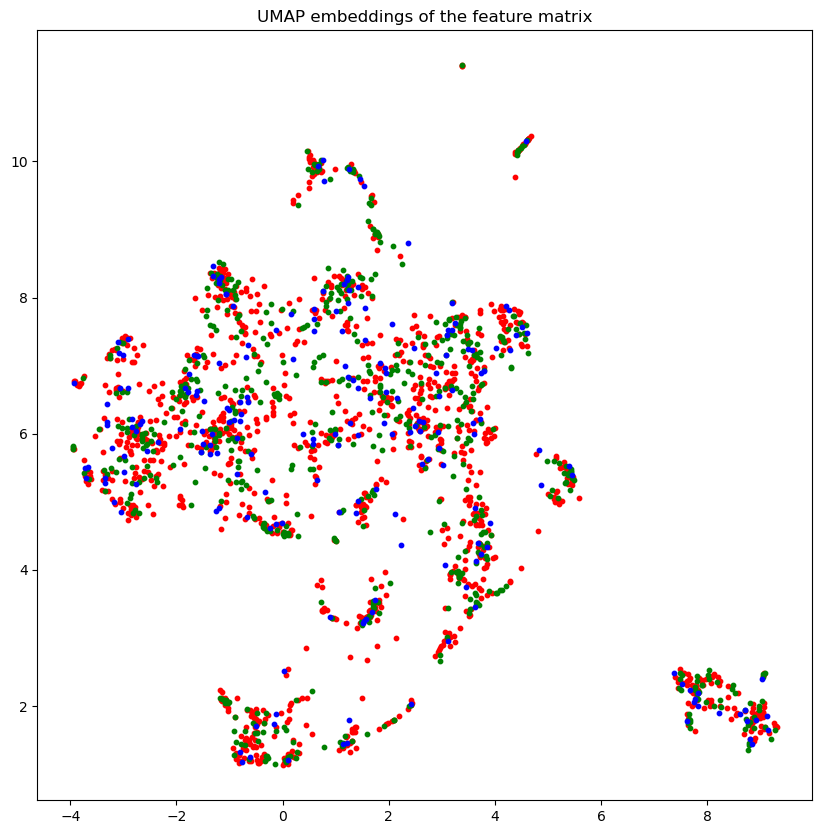

In [329]:
# Umap for dimensionality reduction
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

X_train_10 = X_train[X_train.columns[indices[:20]]]
#X_train_10 = X_train


X_scaled = MinMaxScaler().fit_transform(X_train) # X_train_10
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train_3

# Plot 2D embeddings
# color by label 1-> red, 2-> green, 3-> blue
plt.figure(figsize=(10, 10))
colors = {1: "red", 2: "green", 3: "blue"}
for label, color in colors.items():
    plt.scatter(df_emb.loc[df_emb["label"] == label, "X"], df_emb.loc[df_emb["label"] == label, "Y"], c=color, label=label, s=10)

plt.title("UMAP embeddings of the feature matrix")
plt.show()


              precision    recall  f1-score   support

           1       0.62      1.00      0.77       258
           2       1.00      0.00      0.00       123
           3       1.00      0.00      0.00        35

    accuracy                           0.62       416
   macro avg       0.87      0.33      0.26       416
weighted avg       0.76      0.62      0.47       416



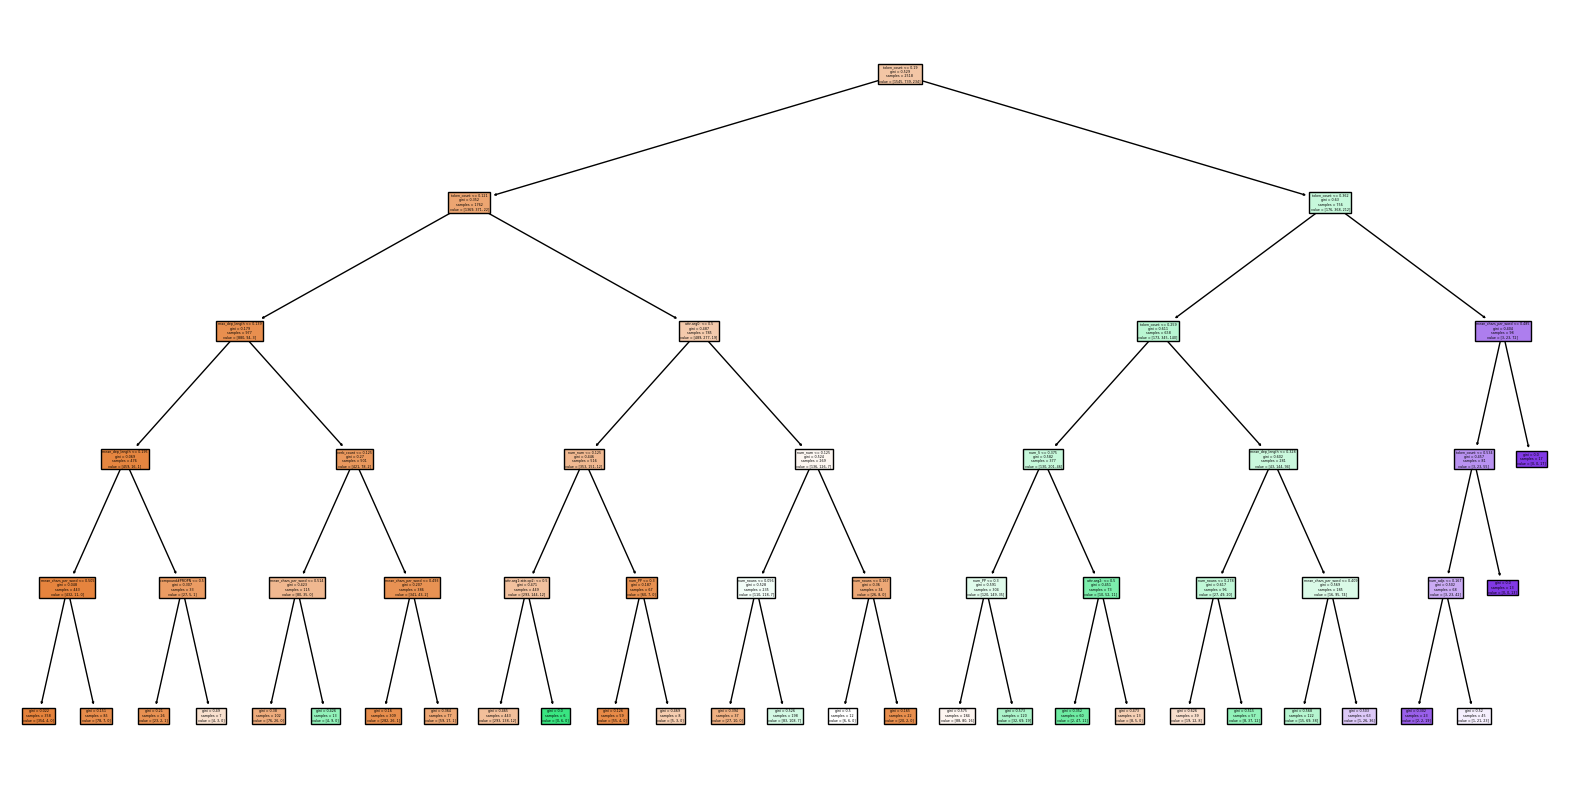

In [331]:
X_train_10 = X_train[X_train.columns[indices[:50]]]
X_test_10 = X_test[X_test.columns[indices[:50]]]

# decision tree
from sklearn.tree import DecisionTreeClassifier

# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=5, min_samples_split=3, min_samples_leaf=5) #class_weight="balanced")

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train_10, y_train_3)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))

# print decision tree with column names

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cols = [a for a in X_train_10.columns]

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=cols, filled=True)
plt.show()


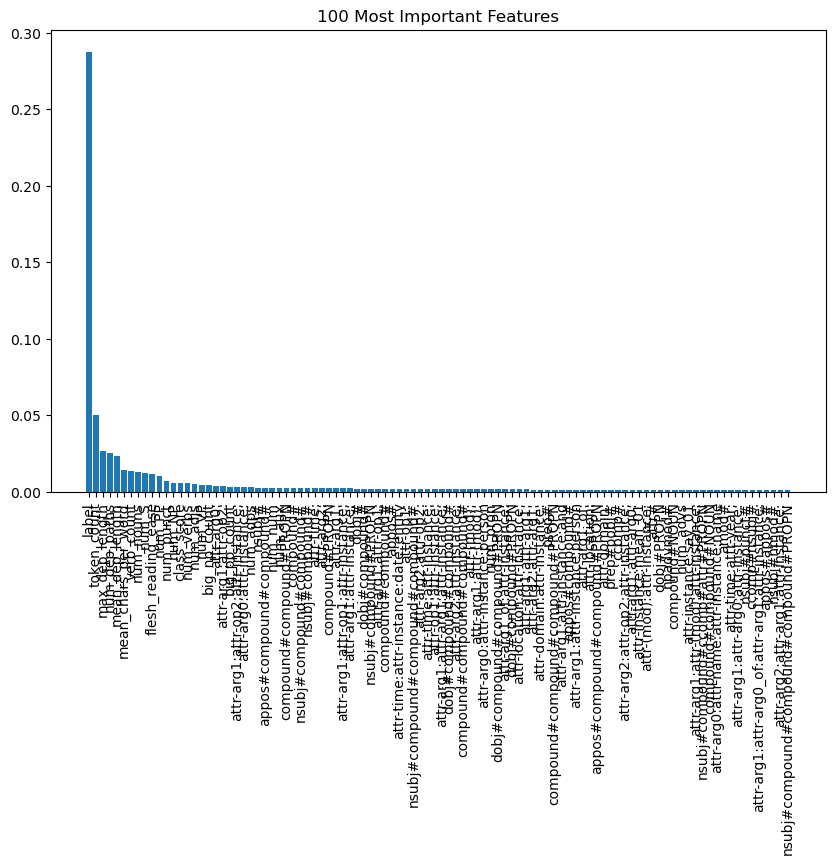

In [275]:
import numpy as np
import matplotlib.pyplot as plt
# 100 most important features
import matplotlib.pyplot as plt

# Hole die wichtigsten Merkmale
importances = rf_clf.feature_importances_

# Sortiere die Merkmale nach ihrer Wichtigkeit
indices = np.argsort(importances)[::-1]

# Plotte die wichtigsten Merkmale
plt.figure(figsize=(10, 6))

plt.bar(range(100), importances[indices[:100]], align='center')
plt.xticks(range(100), X_train.columns[indices[:100]], rotation=90)
plt.title('100 Most Important Features')
plt.show()


In [276]:
# print 10 most important features
for i in range(50):
    print(X_train.columns[indices[i]], importances[indices[i]])
    

label 0.28755613161145416
token_count 0.050090430224311706
max_dep_length 0.026551652239753597
num_dep_paths 0.025318451607257268
mean_dep_length 0.02326944750877163
mean_chars_per_word 0.014391524597028835
verb_count 0.013511305456346783
num_nouns 0.012642861410535122
num_S 0.012306408433739962
flesh_reading_ease 0.011755584313418145
num_PP 0.01036442096274606
num_punct 0.006687068206985233
num_NP 0.00572479701270845
class_score 0.0057223989680924145
num_verbs 0.005401539129291877
num_adjs 0.004797864922879852
num_VP 0.00421596213037736
big_np_count 0.004193327246415707
attr-arg0: 0.0038093018426379305
attr-arg1:attr-op2: 0.0034006387949131766
big_pp_count 0.003289222360904787
attr-arg1:attr-op2:attr-instance: 0.0031307866764572357
attr-arg0:attr-instance: 0.0030196045119286956
num_adps 0.0028615229947999425
nsubj# 0.0026967149807722384
appos#compound#compound# 0.0026019470815426197
num_num 0.002581192203819953
num_aux 0.0024591112777495455
compound#compound#PROPN 0.002356358355863027

In [277]:
# 0, 1, >1
y_train_simple = y_train.apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2)
y_test_simple = y_test.apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2)


### logistic Regression

In [278]:
# all data

# logistic regression 
from sklearn.linear_model import LogisticRegression

# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train
clf.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.69      1.00      0.82       258
           2       0.19      0.07      0.10       123
           3       1.00      0.00      0.00        28
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1

    accuracy                           0.64       416
   macro avg       0.78      0.21      0.18       416
weighted avg       0.57      0.64      0.54       416



In [279]:
# simple labels
# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train
clf.fit(X_train, y_train_simple)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.68      1.00      0.81       258
           2       1.00      0.24      0.39       158

    accuracy                           0.71       416
   macro avg       0.84      0.62      0.60       416
weighted avg       0.80      0.71      0.65       416



In [280]:
# X_train_10
X_train_10 = X_train[X_train.columns[indices[:50]]]
X_test_10 = X_test[X_test.columns[indices[:50]]]

# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train_10
clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))




              precision    recall  f1-score   support

           1       0.69      1.00      0.82       258
           2       0.15      0.05      0.07       123
           3       0.00      0.00      1.00        28
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1

    accuracy                           0.63       416
   macro avg       0.57      0.21      0.38       416
weighted avg       0.49      0.63      0.59       416



In [281]:
# simple labels and X_train_10
# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train_10
clf.fit(X_train_10, y_train_simple)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.68      1.00      0.81       258
           2       1.00      0.23      0.38       158

    accuracy                           0.71       416
   macro avg       0.84      0.62      0.59       416
weighted avg       0.80      0.71      0.65       416



In [282]:
# random forest x_train_10
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       258
           2       0.82      1.00      0.90       123
           3       1.00      0.29      0.44        28
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1

    accuracy                           0.94       416
   macro avg       0.96      0.46      0.47       416
weighted avg       0.95      0.94      0.92       416



In [283]:
# random forest simple labels and X_train_10
# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_10, y_train_simple)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))



              precision    recall  f1-score   support

           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       158

    accuracy                           1.00       416
   macro avg       1.00      1.00      1.00       416
weighted avg       1.00      1.00      1.00       416



In [284]:
# decision tree with simple labels
# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=5, min_samples_split=3, min_samples_leaf=7)#, class_weight="balanced")

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train_10, y_train_simple)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       158

    accuracy                           1.00       416
   macro avg       1.00      1.00      1.00       416
weighted avg       1.00      1.00      1.00       416



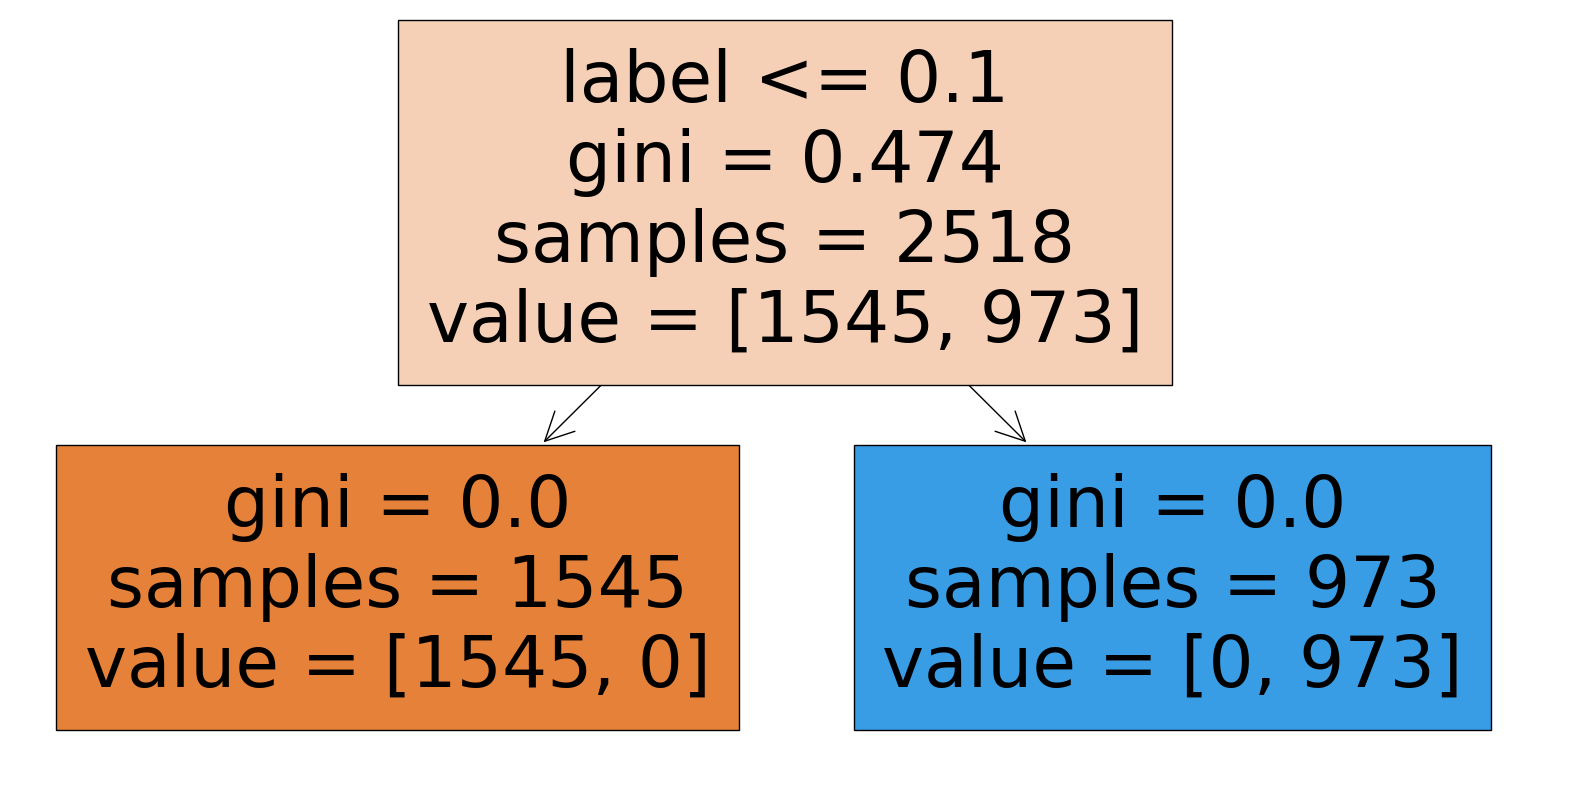

In [285]:
# print decision tree with column names

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cols = [a for a in X_train_10.columns]

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=cols, filled=True)
plt.show()

In [286]:
X_train_10.columns

Index(['label', 'token_count', 'max_dep_length', 'num_dep_paths',
       'mean_dep_length', 'mean_chars_per_word', 'verb_count', 'num_nouns',
       'num_S', 'flesh_reading_ease', 'num_PP', 'num_punct', 'num_NP',
       'class_score', 'num_verbs', 'num_adjs', 'num_VP', 'big_np_count',
       'attr-arg0:', 'attr-arg1:attr-op2:', 'big_pp_count',
       'attr-arg1:attr-op2:attr-instance:', 'attr-arg0:attr-instance:',
       'num_adps', 'nsubj#', 'appos#compound#compound#', 'num_num', 'num_aux',
       'compound#compound#PROPN', 'compound#', 'nsubj#compound#compound#',
       'nsubj#compound#', 'attr-time:', 'attr-arg2:', 'compound#PROPN',
       'attr-arg1:', 'attr-arg1:attr-op1:attr-instance:',
       'attr-arg1:attr-instance:', 'dobj#', 'dobj#compound#',
       'nsubj#compound#PROPN', 'attr-arg1:attr-op1:', 'compound#compound#',
       'appos#', 'attr-time:attr-instance:date_entity', 'attr-op1:',
       'nsubj#compound#compound#compound#', 'attr-arg2:attr-op2:',
       'attr-time:attr-i

In [287]:
#support vector machine
from sklearn.svm import SVC

clf = SVC()#class_weight="balanced")
clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.96      1.00      0.98       258
           2       1.00      0.92      0.96       158
           3       0.00      1.00      0.00         0

    accuracy                           0.97       416
   macro avg       0.65      0.97      0.64       416
weighted avg       0.97      0.97      0.97       416



In [288]:
# mlp
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state= 42)
clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       258
           2       1.00      0.78      0.88       158
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.00      1.00      0.00         0

    accuracy                           0.92       416
   macro avg       0.40      0.96      0.38       416
weighted avg       1.00      0.92      0.95       416



c:\Users\Wiebke Petersen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Todo
- data augmentation by round-trip translation (Finnisch, Türkisch)
- trainieren auf 1, 2, >=3
- augmentieren für data balance